<a href="https://colab.research.google.com/github/SeanBarnier/HAFS_Air-Sea/blob/main/HAFSA_Atmosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieves HAFS-A data from AWS along a storm's track using files generated by getStormTrack.ipynb.

Set up environment

In [ ]:
!pip install cfgrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.5 MB/s eta 0:00:00


In [ ]:
from tropycal import tracks, rain
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import cfgrib

User parameters

In [ ]:
name = "Milton"
tcNum = "14"
filepath = f"/content/{name}"
trackType = "major"


Open TC Data

In [ ]:
tc = pd.read_csv(filepath + "/hurdat2_" + name + "_" + trackType + ".csv")

In [ ]:
tc

,Unnamed: 0,index,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,0,11,2024-10-07 12:00:00,0,NaN,HU,21.8,-92.2,120,943,north_atlantic
1,1,12,2024-10-07 18:00:00,0,NaN,HU,21.7,-91.3,150,908,north_atlantic
2,2,13,2024-10-07 20:00:00,1,I,HU,21.8,-90.9,155,895,north_atlantic
3,3,14,2024-10-08 00:00:00,0,NaN,HU,21.8,-90.4,145,902,north_atlantic
4,4,15,2024-10-08 06:00:00,0,NaN,HU,21.9,-89.5,125,925,north_atlantic
5,5,16,2024-10-08 12:00:00,0,NaN,HU,22.5,-88.8,125,929,north_atlantic
6,6,17,2024-10-08 18:00:00,0,NaN,HU,22.5,-88.0,140,916,north_atlantic
7,7,18,2024-10-08 22:05:00,1,R,HU,22.8,-87.2,145,902,north_atlantic
8,8,19,2024-10-09 00:00:00,0,NaN,HU,23.0,-86.9,140,908,north_atlantic
9,9,20,2024-10-09 02:05:00,1,R,HU,23.3,-86.6,135,916,north_atlantic


Retrieve HAFS-A Atmospheric Data

In [ ]:
#Sample URL: https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/13l.2024100712.hfsa.mom6.f000.nc
#            https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/13l.2024100712.hfsa.parent.atm.

bucket = "https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/"

In [112]:
stormMSLP = {} #Stores pressure along TC track
parentMSLP = {}

In [65]:
import os

start = tc.time[0]
startDate, startTime = start.split(" ")
startYear, startMonth, startDay = startDate.split("-")
startHour, startMinute, startSecond = startTime.split(":")

fHours = range(0, 7, 6) #Forecast goes out 126 hrs in increments of 3 hrs

for hour in fHours:
  fHour = str(hour)
  while len(fHour) < 3: fHour = "0" + fHour

  parentURL = bucket + startDate.replace("-", "") + "/" + startHour + "/" + tcNum + "l." + startDate.replace("-", "") + startHour + ".hfsa.parent.atm.f" + fHour + ".grb2"
  stormURL = bucket + startDate.replace("-", "") + "/" + startHour + "/" + tcNum + "l." + startDate.replace("-", "") + startHour + ".hfsa.storm.atm.f" + fHour + ".grb2"
  !wget -O parentData.grb2 {parentURL}
  !wget -O stormData.grb2 {stormURL}

  stormData = xr.open_dataset("stormData.grb2", engine="cfgrib", decode_timedelta=True, filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
  parentData = xr.open_dataset("parentData.grb2", engine="cfgrib", decode_timedelta=True, filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})



  # Clean up the downloaded files
  #if os.path.exists("parentData.grb2"):
  #  os.remove("parentData.grb2")
  #if os.path.exists("stormData.grb2"):
  #  os.remove("stormData.grb2")

--2025-06-06 18:53:11--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.parent.atm.f000.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 52.216.58.41, 3.5.10.112, 16.182.71.97, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|52.216.58.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 837674250 (799M) [application/octet-stream]
Saving to: ‘parentData.grb2’

parentData.grb2     100%[===================>] 798.87M  70.7MB/s    in 15s     

2025-06-06 18:53:27 (52.3 MB/s) - ‘parentData.grb2’ saved [837674250/837674250]

--2025-06-06 18:53:27--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.storm.atm.f000.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 52.217.126.137, 3.5.28.119, 3.5.27.41, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.co

ERROR:cfgrib.dataset:skipping variable: paramId==228002 shortName='sulwrf'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 726, in build_dataset_components
    dict_merge(variables, {short_name: data_var})
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='sulwrf' value=Variable(dimensions=('latitude', 'longitude'), data=OnDiskArray(index=FileIndex(fieldset=FileStream(path='stormData.grb2', errors='warn'), index_keys=['centre', 'centreDescription', 'dataDate', 'dataTime', 'dataType', 'directionNumber', 'edition', 'endStep', 'frequencyNumber', 'gridType', 'level:float', 'md5GridSection', 'number', 'numberOfPoints', 'paramId', 'step', 'stepType', 'stepUnits', 'subCentre', 'time', 'typeOfLevel', 'uvRelativeToGrid'], filter_by_keys={'paramId': 134}, computed_keys={}, index_protocol_ve

EOFError: End of file: <_io.BufferedReader name='stormData.grb2'>

In [113]:
from datetime import datetime as dt

dateFormat = "%Y-%m-%d %H:%M:%S"
start = dt.strptime(tc.time[0], dateFormat)

for row in tc.iloc:
  rowTime = dt.strptime(row.time, dateFormat)
  if rowTime.hour % 3 != 0 or rowTime.minute != 0: continue #Skip any lines that don't have a HAFS forecast at the same time

  tDiff = rowTime - start
  fHour = str(int(tDiff.total_seconds() / 3600))
  while len(fHour) < 3: fHour = "0" + fHour

  parentURL = bucket + startDate.replace("-", "") + "/" + startHour + "/" + tcNum + "l." + startDate.replace("-", "") + startHour + ".hfsa.parent.atm.f" + fHour + ".grb2"
  stormURL = bucket + startDate.replace("-", "") + "/" + startHour + "/" + tcNum + "l." + startDate.replace("-", "") + startHour + ".hfsa.storm.atm.f" + fHour + ".grb2"

  !wget -O parentData.grb2 {parentURL}
  !wget -O stormData.grb2 {stormURL}

  stormData = xr.open_dataset("stormData.grb2", engine="cfgrib", decode_timedelta=True, filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'meanSea'})
  parentData = xr.open_dataset("parentData.grb2", engine="cfgrib", decode_timedelta=True, filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'meanSea'})

  stormMSLP[row.time] = float(stormData.sel(latitude=row.lat, method="nearest").sel(longitude=row.lon+360, method="nearest").prmsl.data)
  parentMSLP[row.time] = float(parentData.sel(latitude=row.lat, method="nearest").sel(longitude=row.lon+360, method="nearest").prmsl.data)
  print("Parent: ", parentMSLP[row.time], "\nStorm: ", stormMSLP[row.time])

--2025-06-06 19:54:05--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.parent.atm.f000.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 52.217.136.89, 52.217.198.129, 52.217.140.161, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|52.217.136.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 837674250 (799M) [application/octet-stream]
Saving to: ‘parentData.grb2’

parentData.grb2      58%[==========>         ] 466.93M  96.3MB/s    eta 4s     ^C
--2025-06-06 19:54:11--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.storm.atm.f000.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 52.216.44.121, 16.15.216.110, 3.5.16.11, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|52.216.44.121|:443... connected.
HTTP request sent, awaiting respon

ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 274, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 341, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/messages.py", line 97, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gribapi/gribapi.py", line 415, in grib_new_from_file
    GRIB_CHECK(err)
  File "/usr/local/lib/python3.11/dist-packages/gribapi/gribapi.py", line 232, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/usr/local/lib/python3.11/dist-

Parent:  94110.8359375 
Storm:  100503.6328125
--2025-06-06 19:54:19--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.parent.atm.f006.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 16.15.179.177, 52.217.141.161, 3.5.28.209, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|16.15.179.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 849964081 (811M) [application/octet-stream]
Saving to: ‘parentData.grb2’

parentData.grb2     100%[===================>] 810.59M  74.0MB/s    in 12s     

2025-06-06 19:54:31 (65.3 MB/s) - ‘parentData.grb2’ saved [849964081/849964081]

--2025-06-06 19:54:31--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.storm.atm.f006.grb2
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 52.217.126.153, 3.5.29.67, 3.5.30.139, ...
Connecting to noaa-nws-hafs-pds.

In [114]:
parentMSLP

{'2024-10-07 12:00:00': 94110.8359375,
 '2024-10-07 18:00:00': 94505.03125,
 '2024-10-08 00:00:00': 97364.203125,
 '2024-10-08 06:00:00': 98054.546875,
 '2024-10-08 12:00:00': 98036.890625,
 '2024-10-08 18:00:00': 98536.578125,
 '2024-10-09 00:00:00': 97926.0,
 '2024-10-09 06:00:00': 95065.2421875,
 '2024-10-09 12:00:00': 97845.734375,
 '2024-10-09 18:00:00': 98034.0234375,
 '2024-10-10 00:00:00': 98901.375}

In [115]:
stormMSLP

{'2024-10-07 12:00:00': 100503.6328125,
 '2024-10-07 18:00:00': 100083.84375,
 '2024-10-08 00:00:00': 97499.9765625,
 '2024-10-08 06:00:00': 99267.7734375,
 '2024-10-08 12:00:00': 99710.8125,
 '2024-10-08 18:00:00': 99904.25,
 '2024-10-09 00:00:00': 100107.125,
 '2024-10-09 06:00:00': 100436.4765625,
 '2024-10-09 12:00:00': 100686.7265625,
 '2024-10-09 18:00:00': 101013.546875,
 '2024-10-10 00:00:00': nan}

Create MSLP Figure

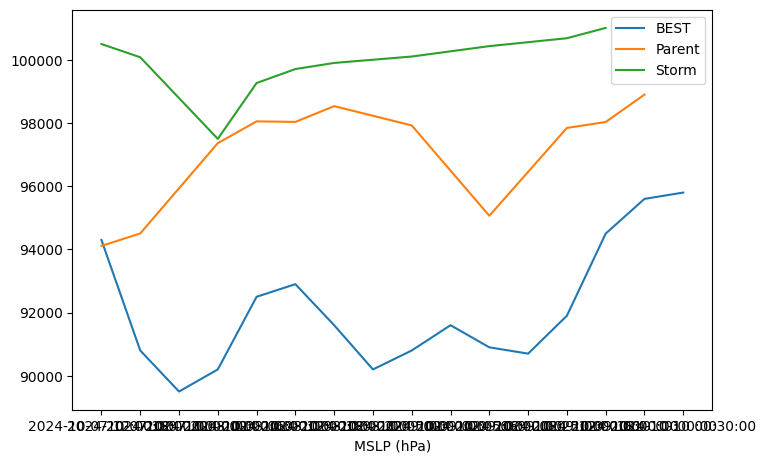

In [117]:
mslpFig = plt.figure(figsize=(8, 5))
mslpAx = mslpFig.add_axes([0.1,0.1,0.8,0.8])

mslpAx.plot(list(tc.time), list(tc.mslp*100), label="BEST")
mslpAx.plot(list(parentMSLP.keys()), list(parentMSLP.values()), label="Parent")
mslpAx.plot(list(stormMSLP.keys()), list(stormMSLP.values()), label="Storm")

mslpAx.set_xlabel("Time")
mslpAx.set_xlabel("MSLP (hPa)")
mslpAx.legend()

mslpFig.savefig(filepath + "/mslp.png")